In [20]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# GENERALIZACIÓN 4 GESTOS PALMA

In [30]:
path = "data_test.csv"

df = pd.read_csv(path)

In [31]:
df_f = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

## XGBoost

In [32]:
modelo_final = pickle.load(open('modelo_XGB.pkl','rb'))

In [33]:
predicciones = modelo_final.predict(df_f)

In [34]:
y_test_numeric = np.array(y_df)
predicciones_numeric = np.array(predicciones)

In [35]:
print(classification_report(y_df, predicciones, zero_division=1))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68        30
           1       0.40      0.55      0.47        31
           2       0.63      0.94      0.75        31
           3       1.00      0.57      0.72        30

    accuracy                           0.65       122
   macro avg       0.74      0.65      0.66       122
weighted avg       0.74      0.65      0.66       122



In [36]:
xgb_accuracy = accuracy_score(y_df, predicciones)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.6475409836065574


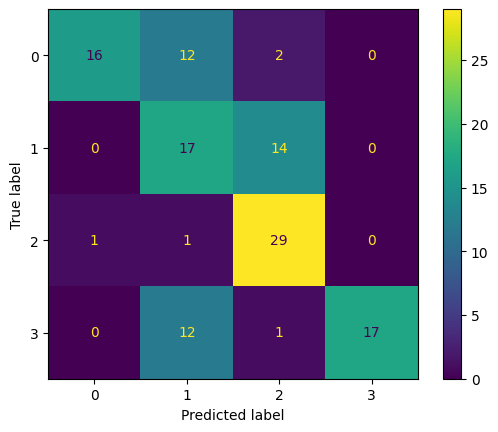

In [37]:
cm = confusion_matrix(y_df, predicciones)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_df))
disp.plot()
plt.show()

## Comparación Modelos

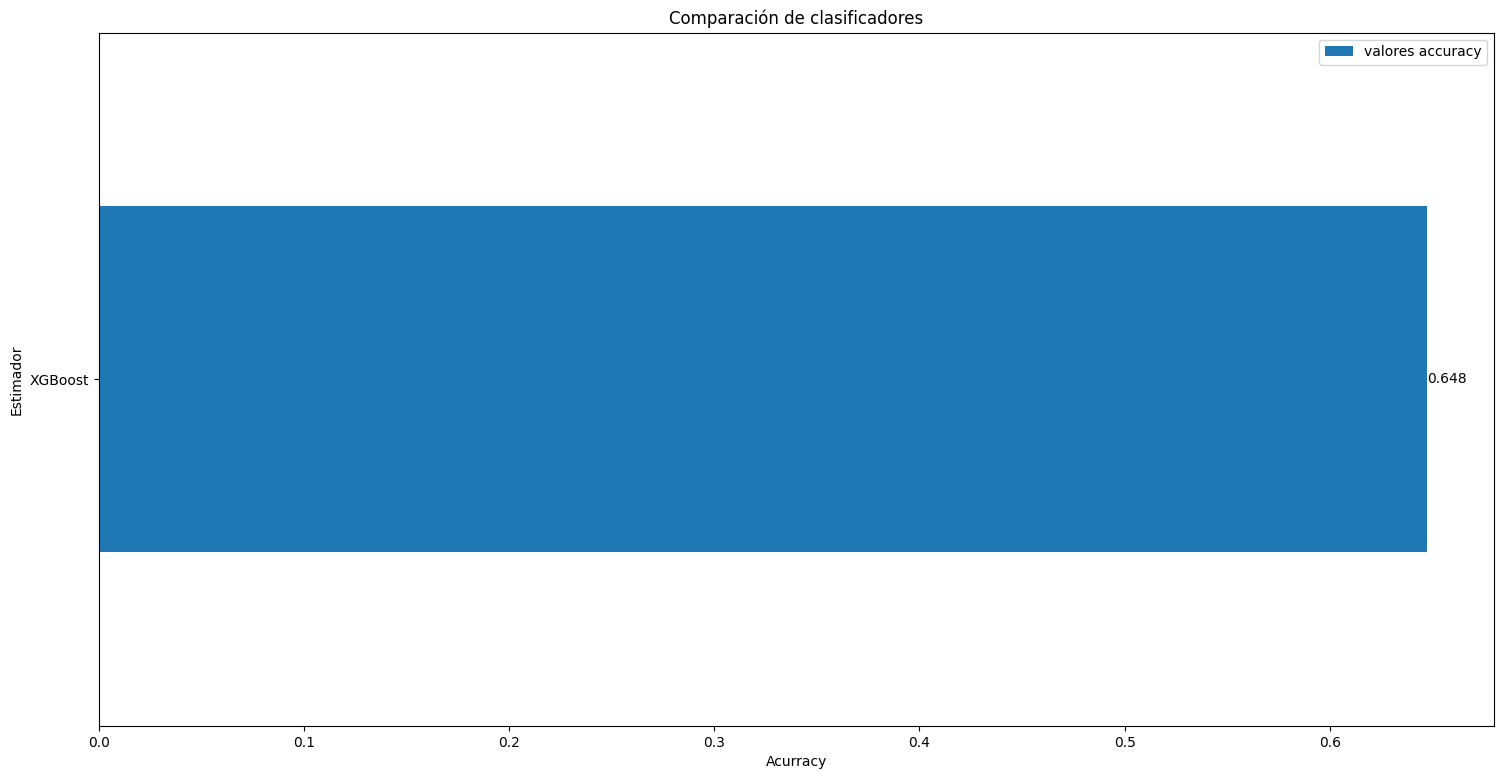

In [38]:
df_comparacion = pd.DataFrame({
                    'estimador': ['XGBoost'],
                    'valores accuracy': [xgb_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)